In [1]:
from AnomalousCommunityDetection.GraphSampler import GraphSampler
from AnomalousCommunityDetection.BiPartiteConverter import BiPartiteConverter
from AnomalousCommunityDetection.Utils import BiPartiteUtils

from AnomalyInfusedCommunityStructuredRandomNetworkGenerator.AnomalyInfusedCommunityStructuredRandomNetworkGenerator import AnomalyInfusedCommunityStructuredRandomNetworkGenerator

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.generators.random_graphs import erdos_renyi_graph, barabasi_albert_graph
import numpy as np
import random
import json

%matplotlib inline  

# Check against a generatd network

#### Generate a ranomd community-structured network

In [104]:
norm_comm_alg = barabasi_albert_graph
anom_comm_alg = erdos_renyi_graph
p_inter = 0.2
k_min = 1
k_max = 2
random_seed = 1

In [114]:
normal_community_sizes = [30, 35, 40]*33
normal_m = 1

In [115]:
simulator = AnomalyInfusedCommunityStructuredRandomNetworkGenerator(norm_comm_alg, anom_comm_alg, p_inter, k_min, k_max, random_seed)

In [116]:
G = simulator.generate_partition_graph(normal_community_sizes, normal_m)

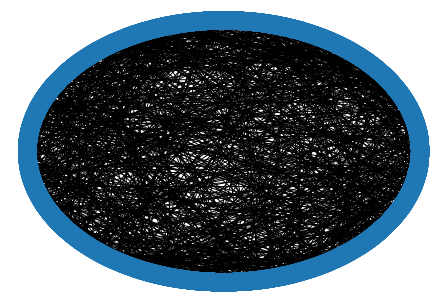

In [117]:
nx.draw_shell(G)

In [118]:
file_path = 'GeneratedPartitions.json'

In [119]:
simulator.save_partitions(file_path)

#### Convert to BiPartite

In [120]:
converter = BiPartiteConverter(file_path)

In [121]:
BPG = converter.generate_bipartite_graph(['comm001', 'comm002', 'comm003'])

In [122]:
BPG.nodes

NodeView(('comm001', 'comm002', 'comm003', '69', '28', '45', '65', '6', '93', '13', '51', '90', '87', '50', '12', '85', '86', '2027', '76', '645', '37', '30', '20', '68', '17', '73', '32', '3188', '2337', '8', '56', '57', '590', '9', '61', '19', '29', '53', '21', '103', '105', '16', '40', '707', '102', '1634', '66', '394', '92', '18', '3219', '23', '81', '1524', '47', '59', '22', '64', '489', '27', '25', '95', '3', '14', '54', '357', '70', '4', '80', '11', '2285', '1597', '89', '1625', '41', '2833', '97', '10', '67', '74', '83', '62', '75', '84', '24', '142', '2', '36', '48', '99', '38', '77', '100', '1', '31', '7', '94', '52', '34', '962', '91', '55', '49', '72', '171', '44', '42', '5', '2436', '79', '101', '2874', '88', '71', '82', '98', '46', '15', '43', '96', '2102', '2374', '2456', '1541', '1951', '104', '2405', '39', '528', '2005', '63', '35', '26', '33', '78', '58', '60'))

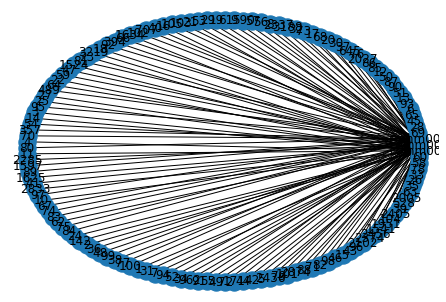

In [123]:
nx.draw_shell(BPG, with_labels=True)

In [124]:
BPG.nodes(data=True)

NodeDataView({'comm001': {'partite': 'Community'}, 'comm002': {'partite': 'Community'}, 'comm003': {'partite': 'Community'}, '69': {'partite': 'Vertex'}, '28': {'partite': 'Vertex'}, '45': {'partite': 'Vertex'}, '65': {'partite': 'Vertex'}, '6': {'partite': 'Vertex'}, '93': {'partite': 'Vertex'}, '13': {'partite': 'Vertex'}, '51': {'partite': 'Vertex'}, '90': {'partite': 'Vertex'}, '87': {'partite': 'Vertex'}, '50': {'partite': 'Vertex'}, '12': {'partite': 'Vertex'}, '85': {'partite': 'Vertex'}, '86': {'partite': 'Vertex'}, '2027': {'partite': 'Vertex'}, '76': {'partite': 'Vertex'}, '645': {'partite': 'Vertex'}, '37': {'partite': 'Vertex'}, '30': {'partite': 'Vertex'}, '20': {'partite': 'Vertex'}, '68': {'partite': 'Vertex'}, '17': {'partite': 'Vertex'}, '73': {'partite': 'Vertex'}, '32': {'partite': 'Vertex'}, '3188': {'partite': 'Vertex'}, '2337': {'partite': 'Vertex'}, '8': {'partite': 'Vertex'}, '56': {'partite': 'Vertex'}, '57': {'partite': 'Vertex'}, '590': {'partite': 'Vertex'},

In [125]:
BiPartiteUtils.print_bipartite_properties(BPG)

BiPartite graph properties:
	Number of 'Vertex'-partite nodes: 134
	Number of 'Community'-partite nodes: 3
	Total number of nodes: 137
	Total number of edges: 134


#### Sample Graph

In [126]:
sampler = GraphSampler(BPG, 'Community', 'Vertex')

In [127]:
positive_edges, negative_edges = sampler.sample_single_graph_edges(12, True)

In [128]:
len(positive_edges)

12

In [129]:
len(negative_edges)

12

In [130]:
# check that the graph contains all positive edges. sum should be equal to number of positive edges.
np.array([BPG.has_edge(*edge) for edge in positive_edges]).sum()

12

In [131]:
# check that the graph does not contain negative edges. sum should be 0.
np.array([BPG.has_edge(*edge) for edge in negative_edges]).sum()

0

# Check against Wikipedia

In [38]:
WIKIPEDIA_PAGE_USER_DICT_PATH = 'E:\\Datasets\\WikipediaHE\\ProcessedData\\PageUserDict_2018-01-01_2019-01-01.json'
TRAIN_SET_COMMS_PATH = 'HeWikiTrainSetCats.json'

In [39]:
with open(TRAIN_SET_COMMS_PATH, 'r') as file:
    train_cats = list(json.load(file).keys())

In [40]:
len(train_cats)

100

In [41]:
convertor = BiPartiteConverter(WIKIPEDIA_PAGE_USER_DICT_PATH)

In [46]:
community_partite_label = 'Page'
vertex_partite_label = 'Wikipedian'

In [47]:
WikiBPG = convertor.generate_bipartite_graph(train_cats, community_partite_label, vertex_partite_label)

In [48]:
BiPartiteUtils.print_bipartite_properties(WikiBPG)

BiPartite graph properties:
	Number of 'Wikipedian'-partite nodes: 2512
	Number of 'Page'-partite nodes: 100
	Total number of nodes: 2612
	Total number of edges: 4622


In [64]:
sampler = GraphSampler(WikiBPG, community_partite_label, vertex_partite_label)

In [65]:
positive_edges, negative_edges = sampler.sample_single_graph_edges(5000, True)

In [66]:
len(positive_edges)

4622

In [67]:
len(negative_edges)

4622

In [68]:
# check that the graph contains all positive edges. sum should be equal to number of positive edges.
np.array([WikiBPG.has_edge(*edge) for edge in positive_edges]).sum()

4622

In [69]:
# check that the graph does not contain negative edges. sum should be 0.
np.array([WikiBPG.has_edge(*edge) for edge in negative_edges]).sum()

0